<a href="https://colab.research.google.com/github/yonaan/PPG-BP/blob/main/PPG-BP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks


# If the CSV file is in Google Drive
# df = pd.read_csv('/content/drive/MyDrive/path/to/your/file.csv')

# If the CSV file is uploaded directly to Colab
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PPG_Signal/p040694.csv')  # Replace 'file.csv' with the path to your CSV file
print(df.head())  # Display the first few rows of the DataFrame

sys = df['Mean_NBP_Sys'].values
dia = df['Mean_NBP_Dias'].values

print(sys, ' / ', dia)

columns_to_remove = ['Mean_NBP_Sys', 'Mean_NBP_Dias']
cleaned_df = df.drop(columns=columns_to_remove)

print(cleaned_df.head())

          0         1         2         3         4         5         6  \
0  1.698925  1.691105  1.682307  1.672532  1.665689  1.660802  1.653959   

          7         8         9  ...     4192      4193     4194      4195  \
0  1.647116  1.641251  1.635386  ...  2.56696  2.507331  2.44477  2.378299   

       4196      4197      4198      4199  Mean_NBP_Sys  Mean_NBP_Dias  
0  2.307918  2.233627  2.158358  2.082111     95.459603       53.60355  

[1 rows x 4202 columns]
[95.45960307]  /  [53.60354951]
          0         1         2         3         4         5         6  \
0  1.698925  1.691105  1.682307  1.672532  1.665689  1.660802  1.653959   

          7         8         9  ...      4190      4191     4192      4193  \
0  1.647116  1.641251  1.635386  ...  2.671554  2.621701  2.56696  2.507331   

      4194      4195      4196      4197      4198      4199  
0  2.44477  2.378299  2.307918  2.233627  2.158358  2.082111  

[1 rows x 4200 columns]


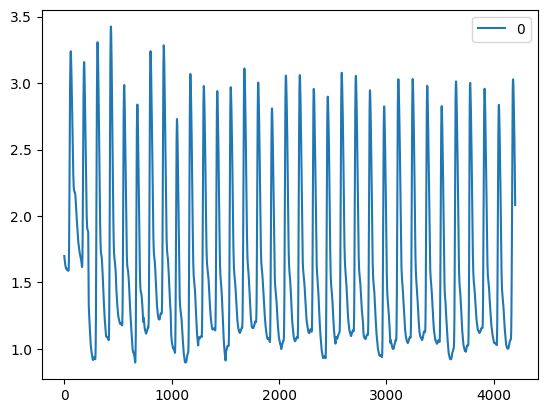

In [21]:
# Transpose the DataFrame
transposed_df = cleaned_df.T

# Plot a line graph of the transposed DataFrame
transposed_df.plot(kind='line')

# Display the plot
plt.show()

In [22]:
def find_peaks_in_data(data):
    """
    Find peaks in the data and plot them.

    Parameters:
    - data: DataFrame or Series with one row or transposed DataFrame

    Returns:
    - peaks: Dictionary containing indices and corresponding values of peaks
    """
    # Convert DataFrame or Series to numpy array
    values = data.values.flatten() if isinstance(data, pd.DataFrame) else data.values

    # Find peaks in the data
    peaks, _ = find_peaks(values)

    # Plot the data and highlight the peaks
    plt.plot(values, label='Data')
    plt.plot(peaks, values[peaks], 'ro', label='Peaks')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Peaks in Data')
    plt.legend()
    plt.show()

    # Return peaks as a dictionary containing indices and corresponding values
    peaks_dict = {'indices': peaks, 'values': values[peaks]}

    # Create a DataFrame containing peak values
    peak_values_df = pd.DataFrame({'Index': peaks, 'Value': values[peaks]})

    return peaks_dict, peak_values_df

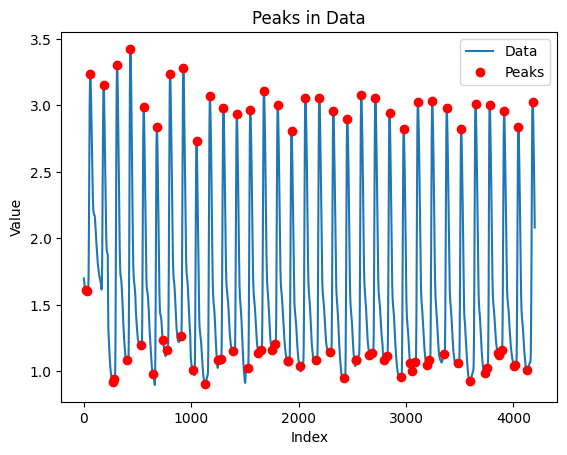

{'indices': array([  18,   30,   60,  185,  272,  281,  310,  404,  434,  530,  558,
        641,  681,  738,  778,  803,  902,  927, 1015, 1050, 1127, 1174,
       1252, 1273, 1300, 1393, 1425, 1526, 1550, 1626, 1652, 1677, 1751,
       1780, 1806, 1897, 1901, 1934, 2013, 2064, 2166, 2193, 2293, 2323,
       2426, 2454, 2531, 2536, 2584, 2660, 2688, 2715, 2798, 2823, 2847,
       2949, 2979, 3041, 3060, 3086, 3111, 3197, 3218, 3245, 3352, 3380,
       3484, 3515, 3597, 3648, 3733, 3756, 3780, 3854, 3866, 3891, 3914,
       4010, 4016, 4047, 4128, 4180]), 'values': array([1.60899316, 1.60117302, 3.23851417, 3.15738025, 0.92375367,
       0.94037146, 3.30694037, 1.08797654, 3.42521994, 1.19648094,
       2.98533724, 0.98240469, 2.83773216, 1.23655914, 1.16226784,
       3.23949169, 1.26783969, 3.28347996, 1.00879765, 2.72922776,
       0.90420332, 3.06744868, 1.08699902, 1.09481916, 2.97751711,
       1.1544477 , 2.93939394, 1.02443793, 2.96871945, 1.13978495,
       1.16031281, 3.10948

In [23]:
peaks, peak_values_df = find_peaks_in_data(transposed_df)
print(peaks)
print(peak_values_df)

In [24]:
def split_values_high_low(filtered_df, threshold=2):
    """
    Split values in filtered_df into two arrays based on the specified threshold for high values.

    Parameters:
    - filtered_df: DataFrame containing filtered values
    - threshold: float, minimum value required to be considered as high (default: 0.6)

    Returns:
    - high_values: list of high values (greater than or equal to threshold)
    - low_values: list of low values (less than threshold)
    """
    high_values = []
    low_values = []

    for value in filtered_df['Value']:
        if value >= threshold:
            high_values.append(value)
            low_values.append(None)  # Placeholder for low value
        else:
            high_values.append(None)  # Placeholder for high value
            low_values.append(value)

    return high_values, low_values



high_values, low_values = split_values_high_low(peak_values_df)
print(high_values)
print(low_values)


[None, None, 3.2385141739980448, 3.157380254154448, None, None, 3.3069403714565007, None, 3.4252199413489737, None, 2.9853372434017595, None, 2.8377321603128056, None, None, 3.239491691104594, None, 3.283479960899316, None, 2.729227761485826, None, 3.067448680351906, None, None, 2.9775171065493646, None, 2.9393939393939394, None, 2.9687194525904204, None, None, 3.1094819159335287, None, None, 3.002932551319648, None, None, 2.809384164222874, None, 3.0557184750733137, None, 3.059628543499511, None, 2.956011730205278, None, 2.897360703812317, None, None, 3.0772238514174, None, None, 3.053763440860215, None, None, 2.945259042033236, None, 2.8240469208211145, None, None, None, 3.0283479960899315, None, None, 3.0303030303030303, None, 2.979472140762464, None, 2.8260019550342133, None, 3.0117302052785924, None, None, 3.0009775171065494, None, None, None, 2.956989247311828, None, None, 2.835777126099707, None, 3.027370478983382]
[1.608993157380254, 1.6011730205278591, None, None, 0.9237536656

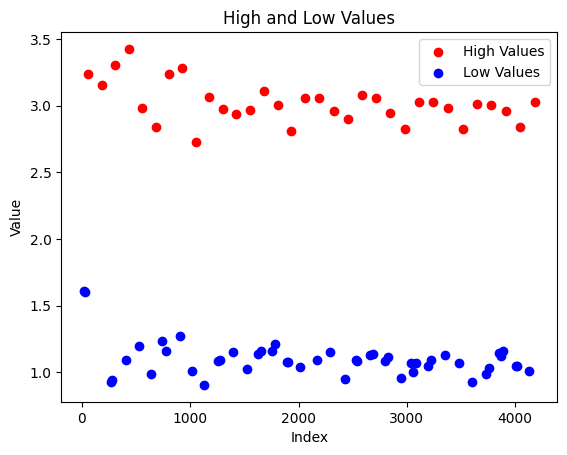

In [25]:
# Plot high values
plt.scatter(peak_values_df['Index'], high_values, color='red', label='High Values')

# Plot low values
plt.scatter(peak_values_df['Index'], low_values, color='blue', label='Low Values')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('High and Low Values')
plt.legend()

# Show plot
plt.show()


In [26]:
# Calculate the average of high values
average_high = np.mean([value for value in high_values if value is not None])

# Calculate the average of low values
average_low = np.mean([value for value in low_values if value is not None])

print("Average High Value:", average_high)
print("Average Low Value:", average_low)



Average High Value: 3.019520720400486
Average Low Value: 1.0991681129929975


In [27]:
# Scale down to 0-1
def scale_down(a, min_val_orig=0, max_val_orig=5, min_val_scale=0, max_val_scale=1):

    scaled_value = min_val_scale + (a - min_val_orig) * (max_val_scale - min_val_scale) / (max_val_orig - min_val_orig)
    return scaled_value

In [28]:
scaled_average_high = scale_down(average_high)
scaled_average_low = scale_down(average_low)
print("Scaled value of", average_high, ":", scaled_average_high)
print("Scaled value of", average_low, ":", scaled_average_low)

Scaled value of 3.019520720400486 : 0.6039041440800972
Scaled value of 1.0991681129929975 : 0.2198336225985995


PPG Systolic Peak = 0.6039041440800972    
PPG Diastolic Peak = 0.2198336225985995     
Mean_NBP_Sys = 95.459603       
Mean_NBP_Dias = 53.60355  

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PPG_Signal/ppg_bp - Sheet1.csv')
data

,high_val,low_val,sys,dia
0,0.719073,0.424168,112.517241,47.448276
1,0.709298,0.479657,126.256098,65.792683
2,0.752976,0.418350,111.797776,62.465094
3,0.615020,0.427451,127.691304,63.152174
4,0.709298,0.479657,126.256098,65.792683
5,0.752976,0.418350,111.797776,62.465094
6,0.737682,0.413119,110.375000,59.743107
7,0.720378,0.326018,119.043478,56.565217
8,0.638936,0.407059,108.557576,55.254545
9,0.594667,0.413020,108.666667,52.583333


In [11]:
Xsys = data["high_val"].values.reshape(-1, 1)
ysys = data["sys"].values.reshape(-1, 1)
Xdia = data["low_val"].values.reshape(-1, 1)
ydia = data["dia"].values.reshape(-1, 1)
print("Shape: ", Xsys.shape, ysys.shape)
print("Shape: ", Xdia.shape, ydia.shape)


Shape:  (31, 1) (31, 1)
Shape:  (31, 1) (31, 1)


Text(0, 0.5, 'Systolic GT')

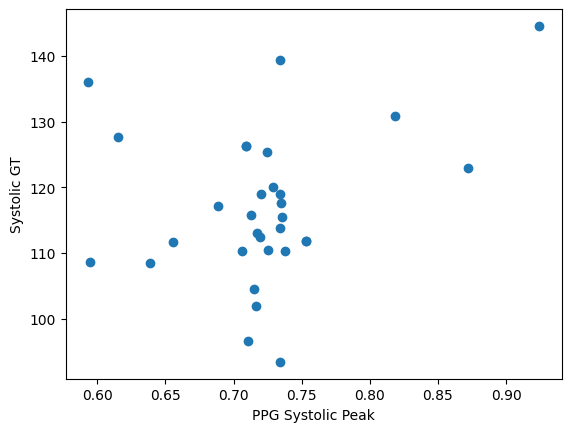

In [12]:
plt.scatter(Xsys, ysys)
plt.xlabel("PPG Systolic Peak")
plt.ylabel("Systolic GT")

Text(0, 0.5, 'Diastolic GT')

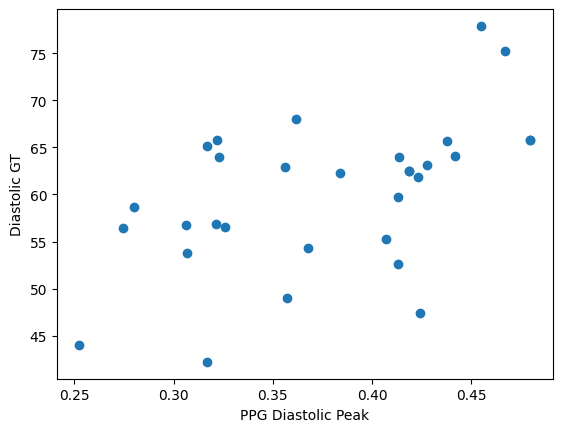

In [13]:
plt.scatter(Xdia, ydia)
plt.xlabel("PPG Diastolic Peak")
plt.ylabel("Diastolic GT")

In [14]:
Xsys_train, Xsys_test, ysys_train, ysys_test = train_test_split(Xsys, ysys, test_size=0.2, random_state=42)
Xdia_train, Xdia_test, ydia_train, ydia_test = train_test_split(Xdia, ydia, test_size=0.2, random_state=42)

In [16]:
ysys_train=ysys_train.ravel()
ydia_train=ydia_train.ravel()


In [30]:
svm_model = SVR()
svm_model.fit(Xsys_train, ysys_train)
svm_predictions = svm_model.predict(Xsys_test)
print(ysys_test)
print(svm_predictions)


[[136.090909]
 [110.301471]
 [119.046265]
 [113.777778]
 [108.557576]
 [108.666667]
 [144.581679]]
[118.10594053 116.18596876 115.35363472 115.35017435 117.57299005
 118.11487996 117.73620075]


In [32]:
systest=np.array([0.6039041440800972])
reshaped_systest = systest.reshape(-1, 1)
syspredict=svm_model.predict(reshaped_systest)
print(syspredict,"/ 95.459603" )

[118.14010823] / 95.459603


In [36]:
svm_model.fit(Xdia_train, ydia_train)
svm_predictions = svm_model.predict(Xdia_test)
print(ydia_test)
print(svm_predictions)

[[65.727273]
 [53.779412]
 [68.032074]
 [56.75    ]
 [55.254545]
 [52.583333]
 [63.950979]]
[63.67985178 58.8797678  59.95991305 58.87460916 61.81418754 62.15909104
 59.10695019]


In [37]:
diatest=np.array([0.2198336225985995])
reshaped_diatest = diatest.reshape(-1, 1)
diapredict=svm_model.predict(reshaped_diatest)
print(diapredict,"/ 53.60355 " )

[59.96467345] / 53.60355 
